In [1]:
import numpy as np
import sys
import pandas as pd
#
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
# from collections import namedtuple

try:
    # for Python2
    from Tkinter import *   ## notice capitalized T in Tkinter 
except ImportError:
    # for Python3
    from tkinter import *   ## notice lowercase 't' in tkinter here

In [2]:
#Import gossip log and filter the messages received on grpc

fileHandle = open('/home/flav/gossip_data/log_rippled_gossip.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip_data/log_rippled_filter.out', 'w+') as f:
    for line in lines:
      if 'received' in line:
        print(line[:-2].replace("	", ""), file=f)
fileHandle.close()

In [12]:
# Create dataset for the gossip and correct the datetime
data = pd.read_csv('/home/flav/gossip_data/log_gossip_filter.out', sep="|", header=None, usecols=[0,2,3])
df = pd.DataFrame(data)

df["hash"] = df[2].apply(hash)

print(df)

dups= df.pivot_table(columns=["hash"], aggfunc='size')
dups = dups.sort_values(ascending=False)
avg = np.mean(dups)
max = np.max(dups)
print(dups)
print(max)

                           0   2  \
0      2021/10/28 19:24:24     "   
1      2021/10/28 19:24:24     "   
2      2021/10/28 19:24:24     "   
3      2021/10/28 19:24:24     "   
4      2021/10/28 19:24:24     "   
...                      ...  ..   
13185  2021/10/28 19:37:57     "   
13186  2021/10/28 19:37:57     "   
13187  2021/10/28 19:37:57     "   
13188  2021/10/28 19:37:57     "   
13189  2021/10/28 19:37:57     "   

                                                       3                 hash  
0       "n9MwM3N1URHH2jh9sfX7WRGnNBFJ3zLJoyKruuY4dHCv...  2742082070537616131  
1       "n9MwM3N1URHH2jh9sfX7WRGnNBFJ3zLJoyKruuY4dHCv...  2742082070537616131  
2       "n9MwM3N1URHH2jh9sfX7WRGnNBFJ3zLJoyKruuY4dHCv...  2742082070537616131  
3       "n9MwM3N1URHH2jh9sfX7WRGnNBFJ3zLJoyKruuY4dHCv...  2742082070537616131  
4       "n9MwM3N1URHH2jh9sfX7WRGnNBFJ3zLJoyKruuY4dHCv...  2742082070537616131  
...                                                  ...                  ...  
13185  

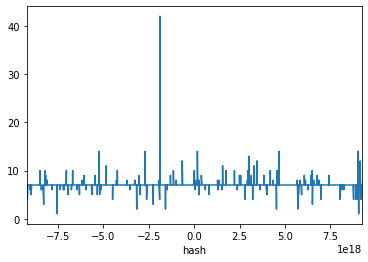

In [130]:
dups.plot(kind='line')

In [12]:
#Is rippled sending dupicated messages to grpc?

#Import gossip log and filter the messages received on grpc

fileHandle = open('/home/flav/gossip_data/log_gossip_rippled_send.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip_data/log_rippled_filter_sent.out', 'w+') as f:
    for line in lines:
      if 'message sent' in line:
        print(line[:-2].replace("	", ""), file=f)
fileHandle.close()

In [13]:
_# Create dataset for the gossip and correct the datetime
data = pd.read_csv('/home/flav/gossip_data/log_rippled_filter_sent.out', sep="|", header=None)#, usecols=[0,2,3])
df = pd.DataFrame(data)

df["hash"] = df[2].apply(hash)

print(df)

ParserError: Error tokenizing data. C error: Expected 4 fields in line 583, saw 7
